In [3]:
#安装相关程序包
import urllib    #爬虫下载器
from bs4 import BeautifulSoup   #爬虫解析器
#安装wordcloud（删去下一行的#即可）
#!conda install -c conda-forge wordcloud==1.4.1 --yes
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt    
import datetime   #日期戳

In [2]:
#设定希望爬取的时间范围
Year_s=int(input("请输入开始年份"))
Month_s=int(input("请输入开始月份"))
Day_s=int(input("请输入开始日期"))
Date1=datetime.date(Year_s,Month_s,Day_s)
Date_end=datetime.date.today()
a=datetime.timedelta(days=1)
#生成URL列表
date_list=[]
while Date1<=Date_end:
    mon='0'+str(Date1.month)
    if Date1.day<10:
        day_='0'+str(Date1.day)
    else:
        day_=str(Date1.day)
    date_str=mon+'/'+day_
    date_list.append(date_str)
    Date1=Date1+a
begin='https://www.nytimes.com/issue/todayspaper/2020/'
end='/todays-new-york-times'
URL_list=[]
for i in date_list:
    url_str=begin+i+end
    URL_list.append(url_str)

请输入开始年份2020
请输入开始月份3
请输入开始日期1


In [21]:
#爬取标题内容并存入txt文档
title=open('Times_title.txt','w')
for i in URL_list:
    response= urllib.request.urlopen(i)
    cont=response.read()
    soup=BeautifulSoup(cont,'html.parser',from_encoding='utf-8')
    links=soup.find_all('h2')
    for link in links:
        class1=link.get('class')
        if class1 == ['css-myoh8a', 'e1f68otr0'] or class1==['css-l2vidh','e4e4i5l1']:
            title.write('%s\n'%(link.get_text()))

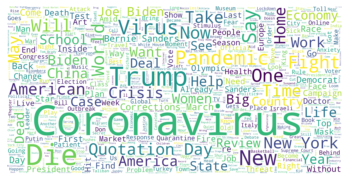

In [22]:
#设置需屏蔽的单词
stopwords = set(STOPWORDS)
stopwords.add('Say')
stopwords.add('one')
#设置词汇云
NYtime_wc = WordCloud(width=1200,height=600,prefer_horizontal=0.9,scale=4,background_color='white',max_words=1000,
                      stopwords=stopwords,collocations=True)
#输入待解析文档
NYtime=open('Times_title.txt','r').read()
NYtime_wc.generate(NYtime)
#生成词汇云
plt.imshow(NYtime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()
#下载生成的词汇云
WordCloud.to_file(NYtime_wc ,'test.png')